# Importing Libraries

In [70]:
# Importing the Libraray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [71]:
# Reading the dataset
df = pd.read_csv("Fraud.csv")

# Printing the data

In [72]:
# Printing the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Statistical analysis

In [73]:
# Print the shape of the data
df.shape

(6362620, 11)

In [74]:
# Printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [75]:
# Describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [76]:
# Checking the missing values in the data
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [77]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Exploratory Data Analysis

In [78]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


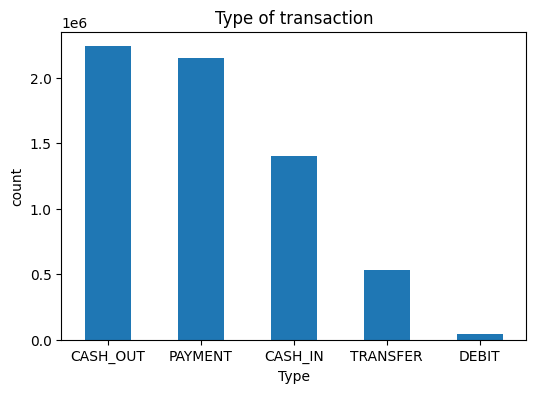

In [79]:
plt.figure(figsize = (6,4))
df['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction')
plt.xticks(rotation = 0)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

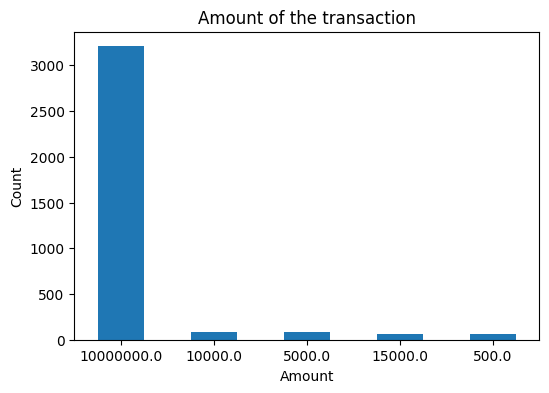

In [80]:
plt.figure(figsize = (6,4))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title("Amount of the transaction")
plt.xticks(rotation = 0)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [81]:
df.groupby('type').count()['amount']

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: amount, dtype: int64

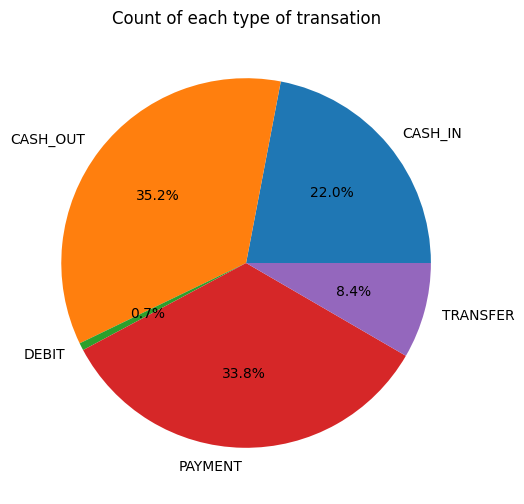

In [82]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (8,6))
plt.pie(counts, labels = counts.index, autopct = '%1.1f%%')
plt.title('Count of each type of transation')
plt.show()

In [83]:
df.groupby(['type', 'isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

# Finding the correlation between the attributes (Pearson correlation matrix)

In [84]:
# Selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# Person corrleation matrix of the numerical data
correlation = numeric_data.corr()

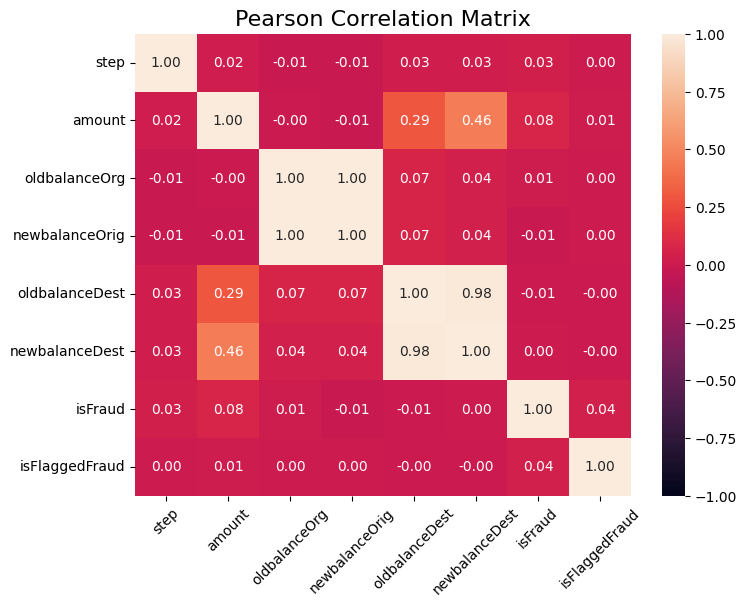

In [85]:
# Visulaising the correlation matrix
plt.figure(figsize = (8, 6))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

# Implemention of machine learning algorithm:

In [86]:
# Removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, nameOrig, nameDest
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest'], axis = 1, inplace = True, errors = 'ignore')

In [87]:
# Printing the dataframe after removing the columns
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [88]:
# Encoding the categorical column into numerical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [89]:
# Separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [90]:
# Standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [91]:
# Splitting the data into training and testing test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

# Logistic Regression

In [92]:
# Make an object of Logistic regression
lr = LogisticRegression()

# Fitting the training data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred = lr.predict(X_test)

In [94]:
# Calculating the performance matrix

# Accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

# Precision of the Logistic regression
precision_lr = precision_score(y_test, y_pred)

# Recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)

# Classification report
classification_lr = classification_report(y_test, y_pred)

# Print the performance matrix
print(f"Accuracy of the logistic regression {accuracy_lr}")
print(f"Precision of the logistic regression {precision_lr}")
print(f"Recall of the logistic regression {recall_lr}")
print(f"Classification Report of the logistic regression\n {classification_lr}")

Accuracy of the logistic regression 0.9987080793761061
Precision of the logistic regression 0.15555555555555556
Recall of the logistic regression 0.002874743326488706
Classification Report of the logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.16      0.00      0.01      2435

    accuracy                           1.00   1908786
   macro avg       0.58      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



# Decision Tree

In [ ]:
# Make an object of Decision Tree
sv = DecisionTreeClassifier(max_depth = 20)

# Fitting the training data into lr model
sv.fit(X_train, y_train)

# Testing the model on test data
y_pred = sv.predict(X_test)

In [ ]:
# Calculating the performance matrix

# Accuracy of the Decision Tree
accuracy_sv = accuracy_score(y_test, y_pred)

# Accuracy of the Decision Tree
precision_sv = precision_score(y_test, y_pred)

# Recall of the Decision Tree
recall_sv = recall_score(y_test, y_pred)

# Classification report
classification_sv = classification_report(y_test, y_pred)

# Print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_sv}")
print(f"Precision of Decision Tree {precision_sv}")
print(f"Recall of Decision Tree {recall_sv}")
print(f"Classification Report of Decision Tree {classification_sv}")

# Comparing the model

In [61]:
performance_df = pd.DataFrame({
    'models' : ['Logistic Regression', 'Decision Tree'],
    'accuracy' : [accuracy_lr, accuracy_sv],
    'precision' : [precision_lr, precision_sv],
    'recall' : [recall_lr, recall_sv]
})
performance_df

,models,accuracy,precision,recall
0,Logistic Regression,0.998708,0.155556,0.002875
1,Decision Tree,0.998979,0.665985,0.401232


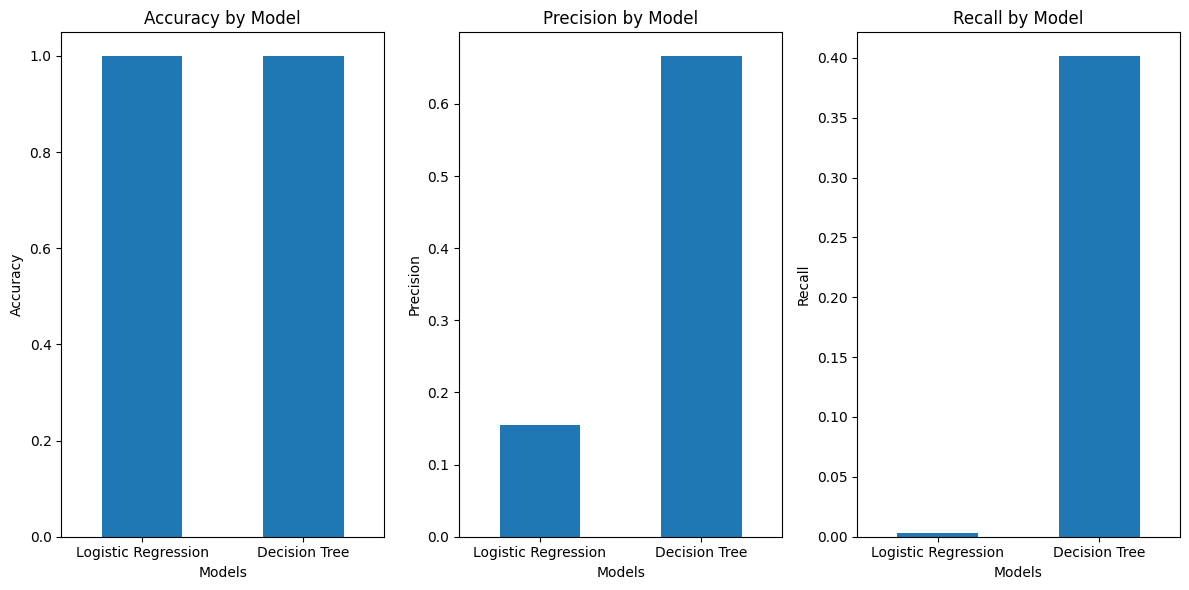

In [65]:
# Create a figure and multiple objects
fig, ax = plt.subplots(1, 3, figsize=(12, 6)) # 1 row, 3 columns

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i])

    # Set the tick labels and rotation
    ax[i].set_xticklabels(performance_df['models'], rotation = 0)

    # Adding labels
    ax[i].set_xlabel('Models')
    ax[i].set_ylabel(metric.capitalize())
    ax[i].set_title(f'{metric.capitalize()} by Model')

plt.tight_layout()
plt.show()